In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.io import arff

In [40]:
# Read the ARFF file
data = arff.loadarff('../data/ObesityDataSet_raw_and_data_sinthetic.arff')
df = pd.DataFrame(data[0])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,b'Female',21.000000,1.620000,64.000000,b'yes',b'no',2.0,3.0,b'Sometimes',b'no',2.000000,b'no',0.000000,1.000000,b'no',b'Public_Transportation',b'Normal_Weight'
1,b'Female',21.000000,1.520000,56.000000,b'yes',b'no',3.0,3.0,b'Sometimes',b'yes',3.000000,b'yes',3.000000,0.000000,b'Sometimes',b'Public_Transportation',b'Normal_Weight'
2,b'Male',23.000000,1.800000,77.000000,b'yes',b'no',2.0,3.0,b'Sometimes',b'no',2.000000,b'no',2.000000,1.000000,b'Frequently',b'Public_Transportation',b'Normal_Weight'
3,b'Male',27.000000,1.800000,87.000000,b'no',b'no',3.0,3.0,b'Sometimes',b'no',2.000000,b'no',2.000000,0.000000,b'Frequently',b'Walking',b'Overweight_Level_I'
4,b'Male',22.000000,1.780000,89.800000,b'no',b'no',2.0,1.0,b'Sometimes',b'no',2.000000,b'no',0.000000,0.000000,b'Sometimes',b'Public_Transportation',b'Overweight_Level_II'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,b'Female',20.976842,1.710730,131.408528,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',1.728139,b'no',1.676269,0.906247,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2107,b'Female',21.982942,1.748584,133.742943,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.005130,b'no',1.341390,0.599270,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2108,b'Female',22.524036,1.752206,133.689352,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.054193,b'no',1.414209,0.646288,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'
2109,b'Female',24.361936,1.739450,133.346641,b'yes',b'yes',3.0,3.0,b'Sometimes',b'no',2.852339,b'no',1.139107,0.586035,b'Sometimes',b'Public_Transportation',b'Obesity_Type_III'


In [41]:
# String values are decoded as strings using the UTF-8 encoding.
df['Gender'] = df['Gender'].str.decode('utf-8')
df['family_history_with_overweight'] = df['family_history_with_overweight'].str.decode('utf-8')
df['FAVC'] = df['FAVC'].str.decode('utf-8')
df['CAEC'] = df['CAEC'].str.decode('utf-8')
df['SMOKE'] = df['SMOKE'].str.decode('utf-8')
df['SCC'] = df['SCC'].str.decode('utf-8')
df['CALC'] = df['CALC'].str.decode('utf-8')
df['MTRANS'] = df['MTRANS'].str.decode('utf-8')
df['NObeyesdad'] = df['NObeyesdad'].str.decode('utf-8')

In [42]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [44]:
# checking null values
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [45]:
# checking duplicates
df.duplicated().sum()

24

In [46]:
# Dropping duplicates from DataFrame
df = df.drop_duplicates()

In [48]:
# checking duplicates once again
df.duplicated().sum()

0

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

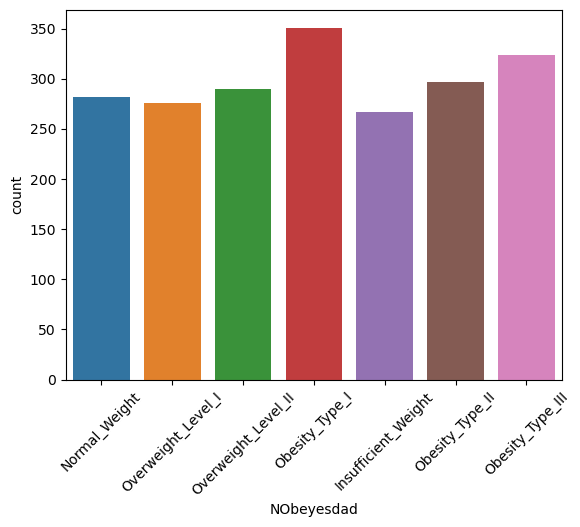

In [47]:
#Checking for imbalance data
sns.countplot(df['NObeyesdad'])
plt.xticks(rotation=45)

In [70]:
# separate numerical columns and categorical columns from a DataFrame
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = list(df.select_dtypes(include=['object']).columns)
categorical_columns.remove('NObeyesdad')

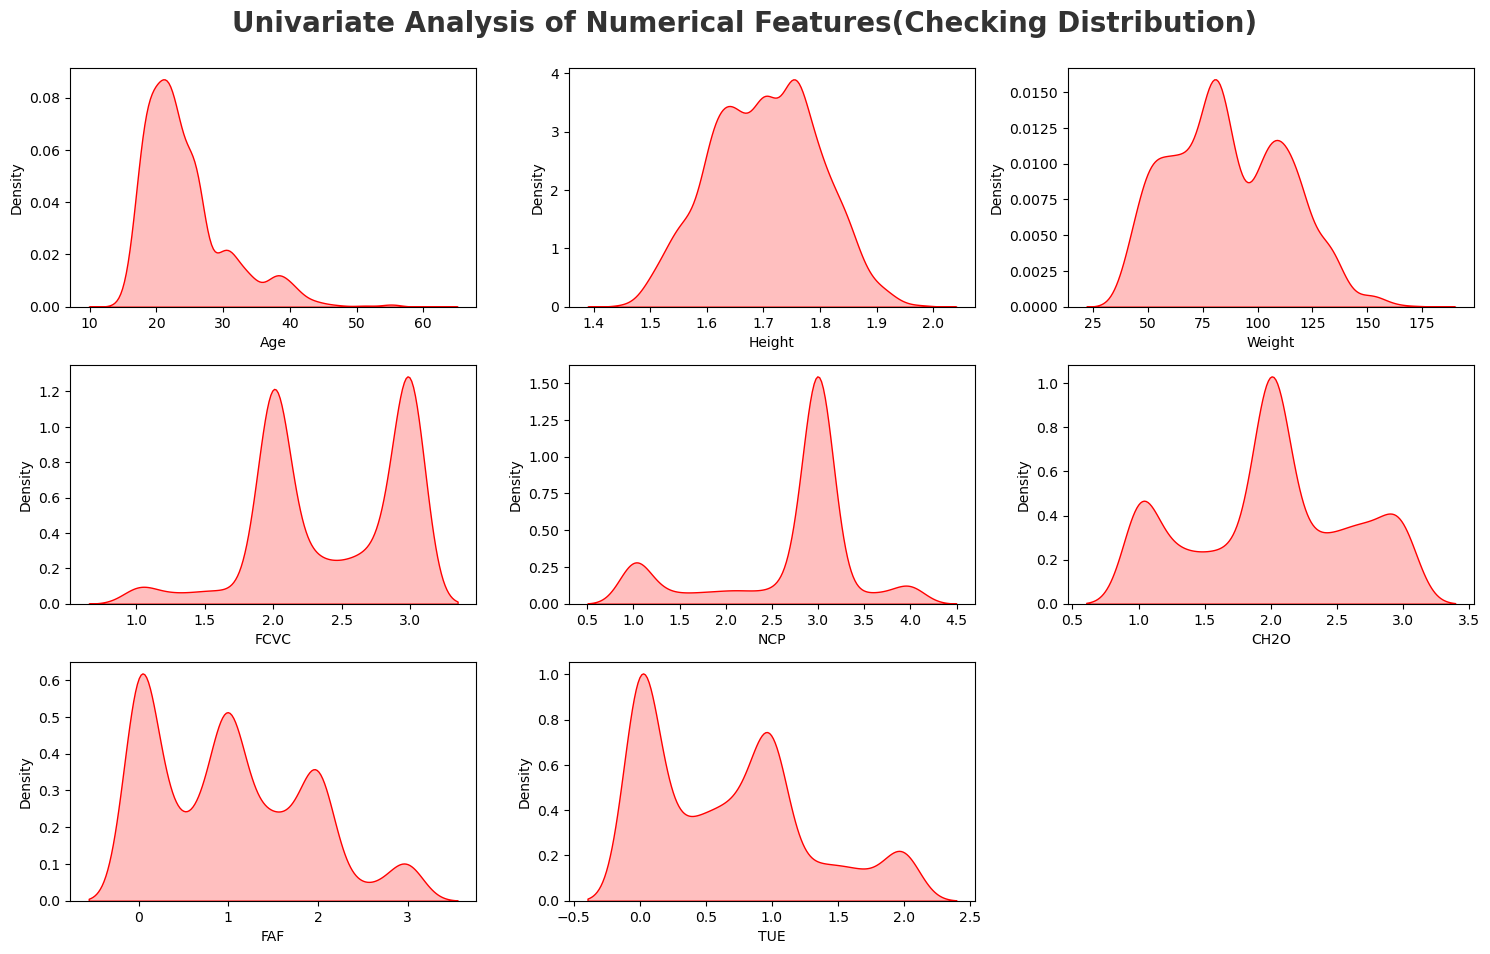

In [60]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Distribution)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_columns[i]],shade=True, color='r')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

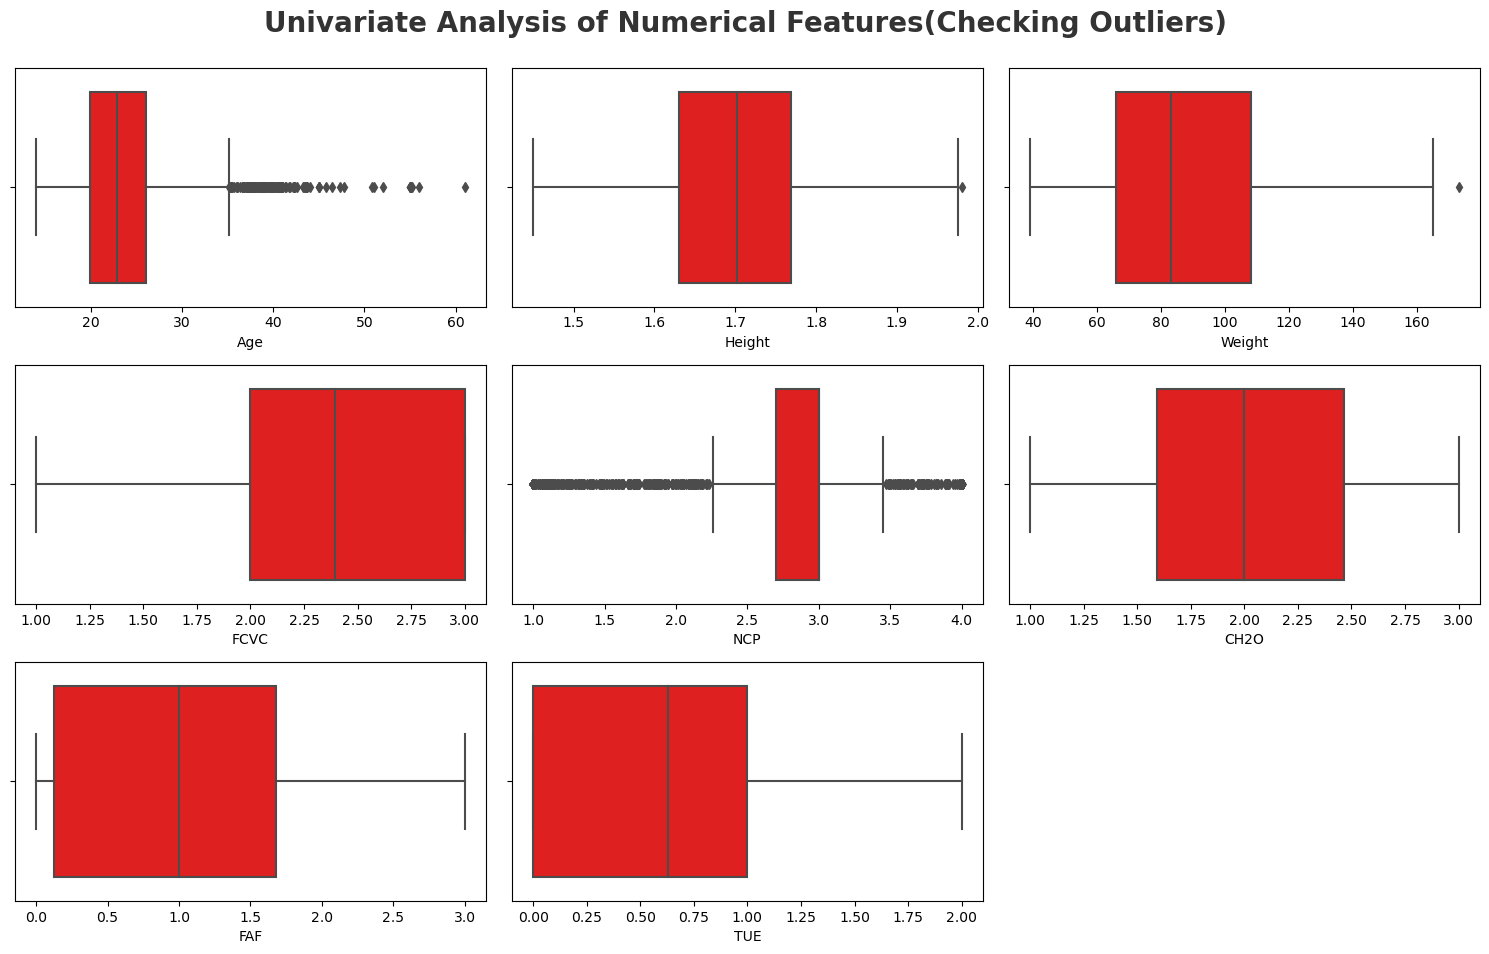

In [62]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Outliers)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numerical_columns[i]], color='r')
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

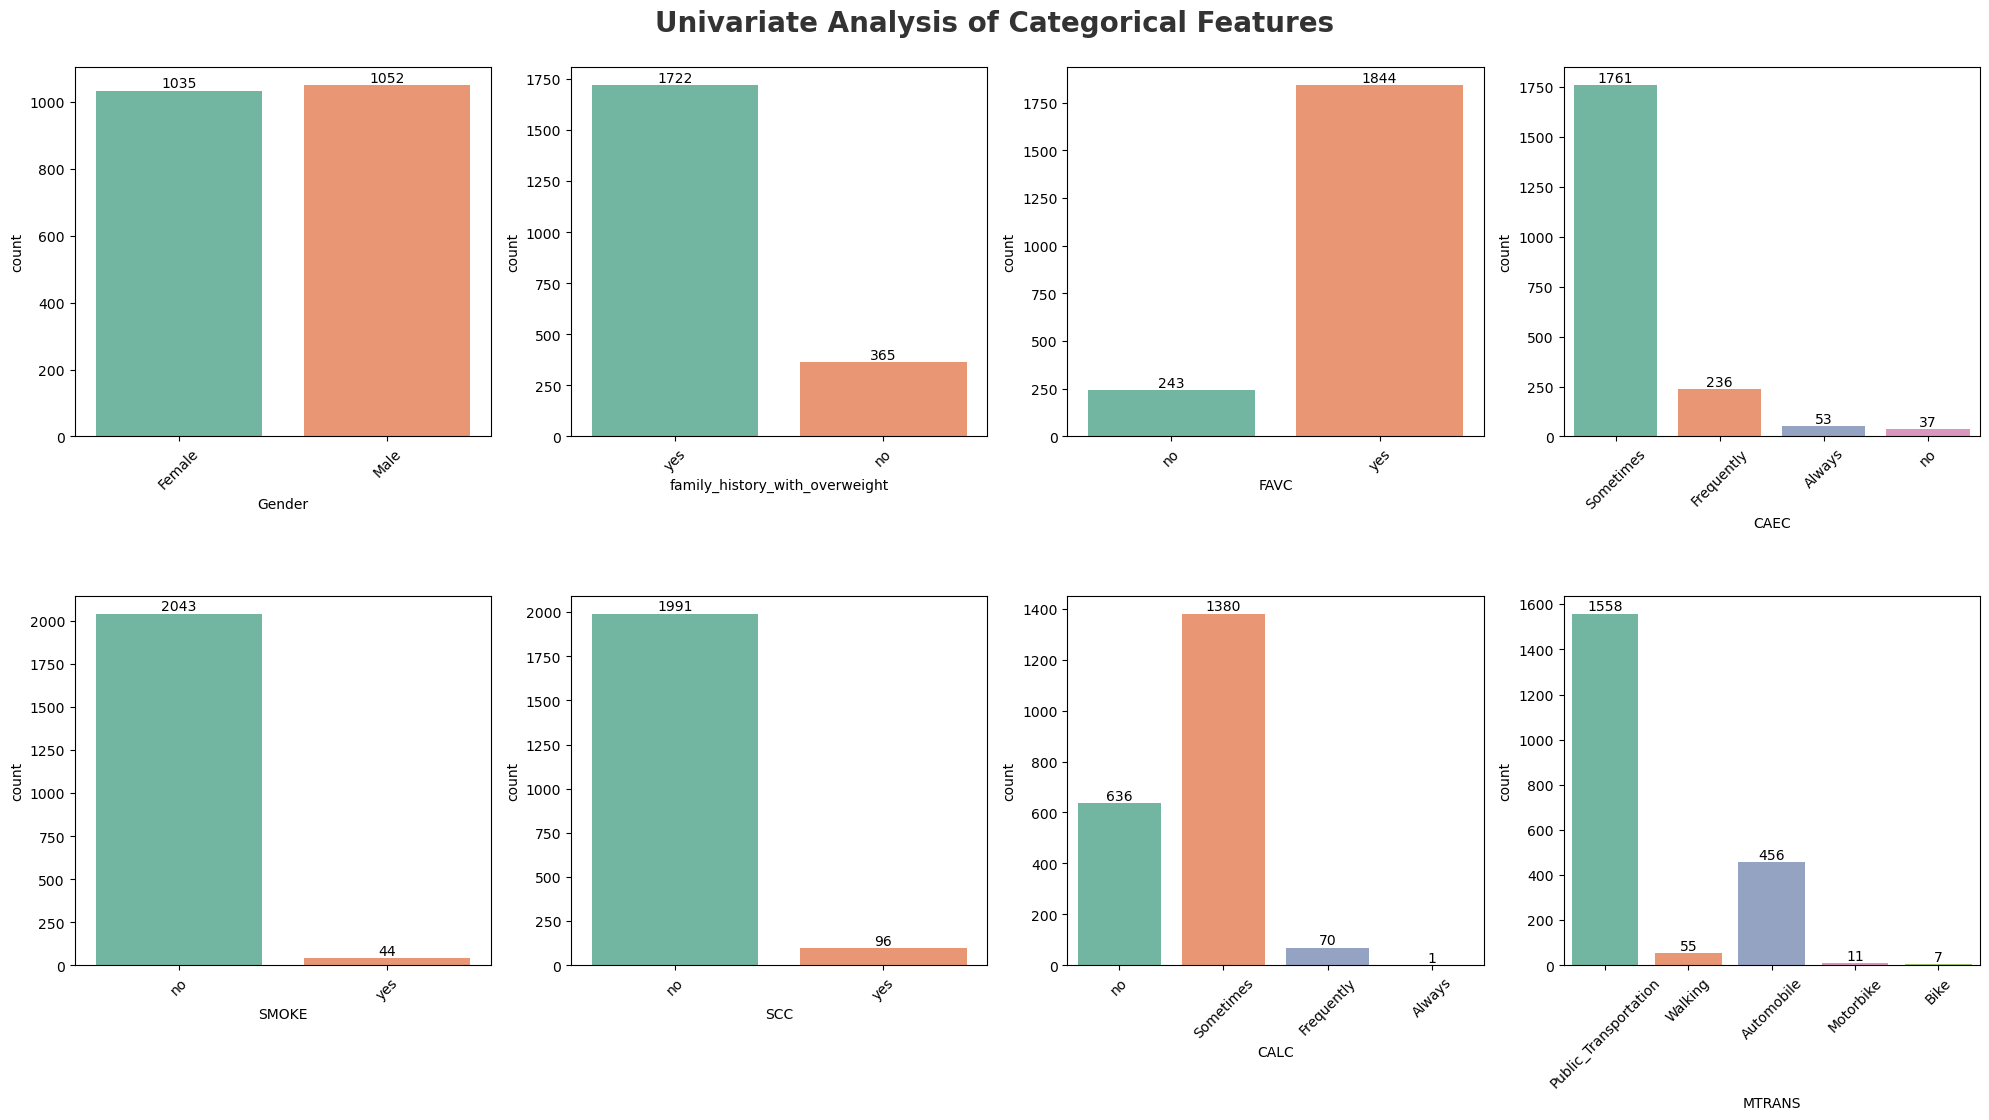

In [71]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = categorical_columns.copy()
for i in range(0, len(category)):
    plt.subplot(3, 4, i+1)
    img = sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    for c in img.containers:
        img.bar_label(c)
    plt.tight_layout() 

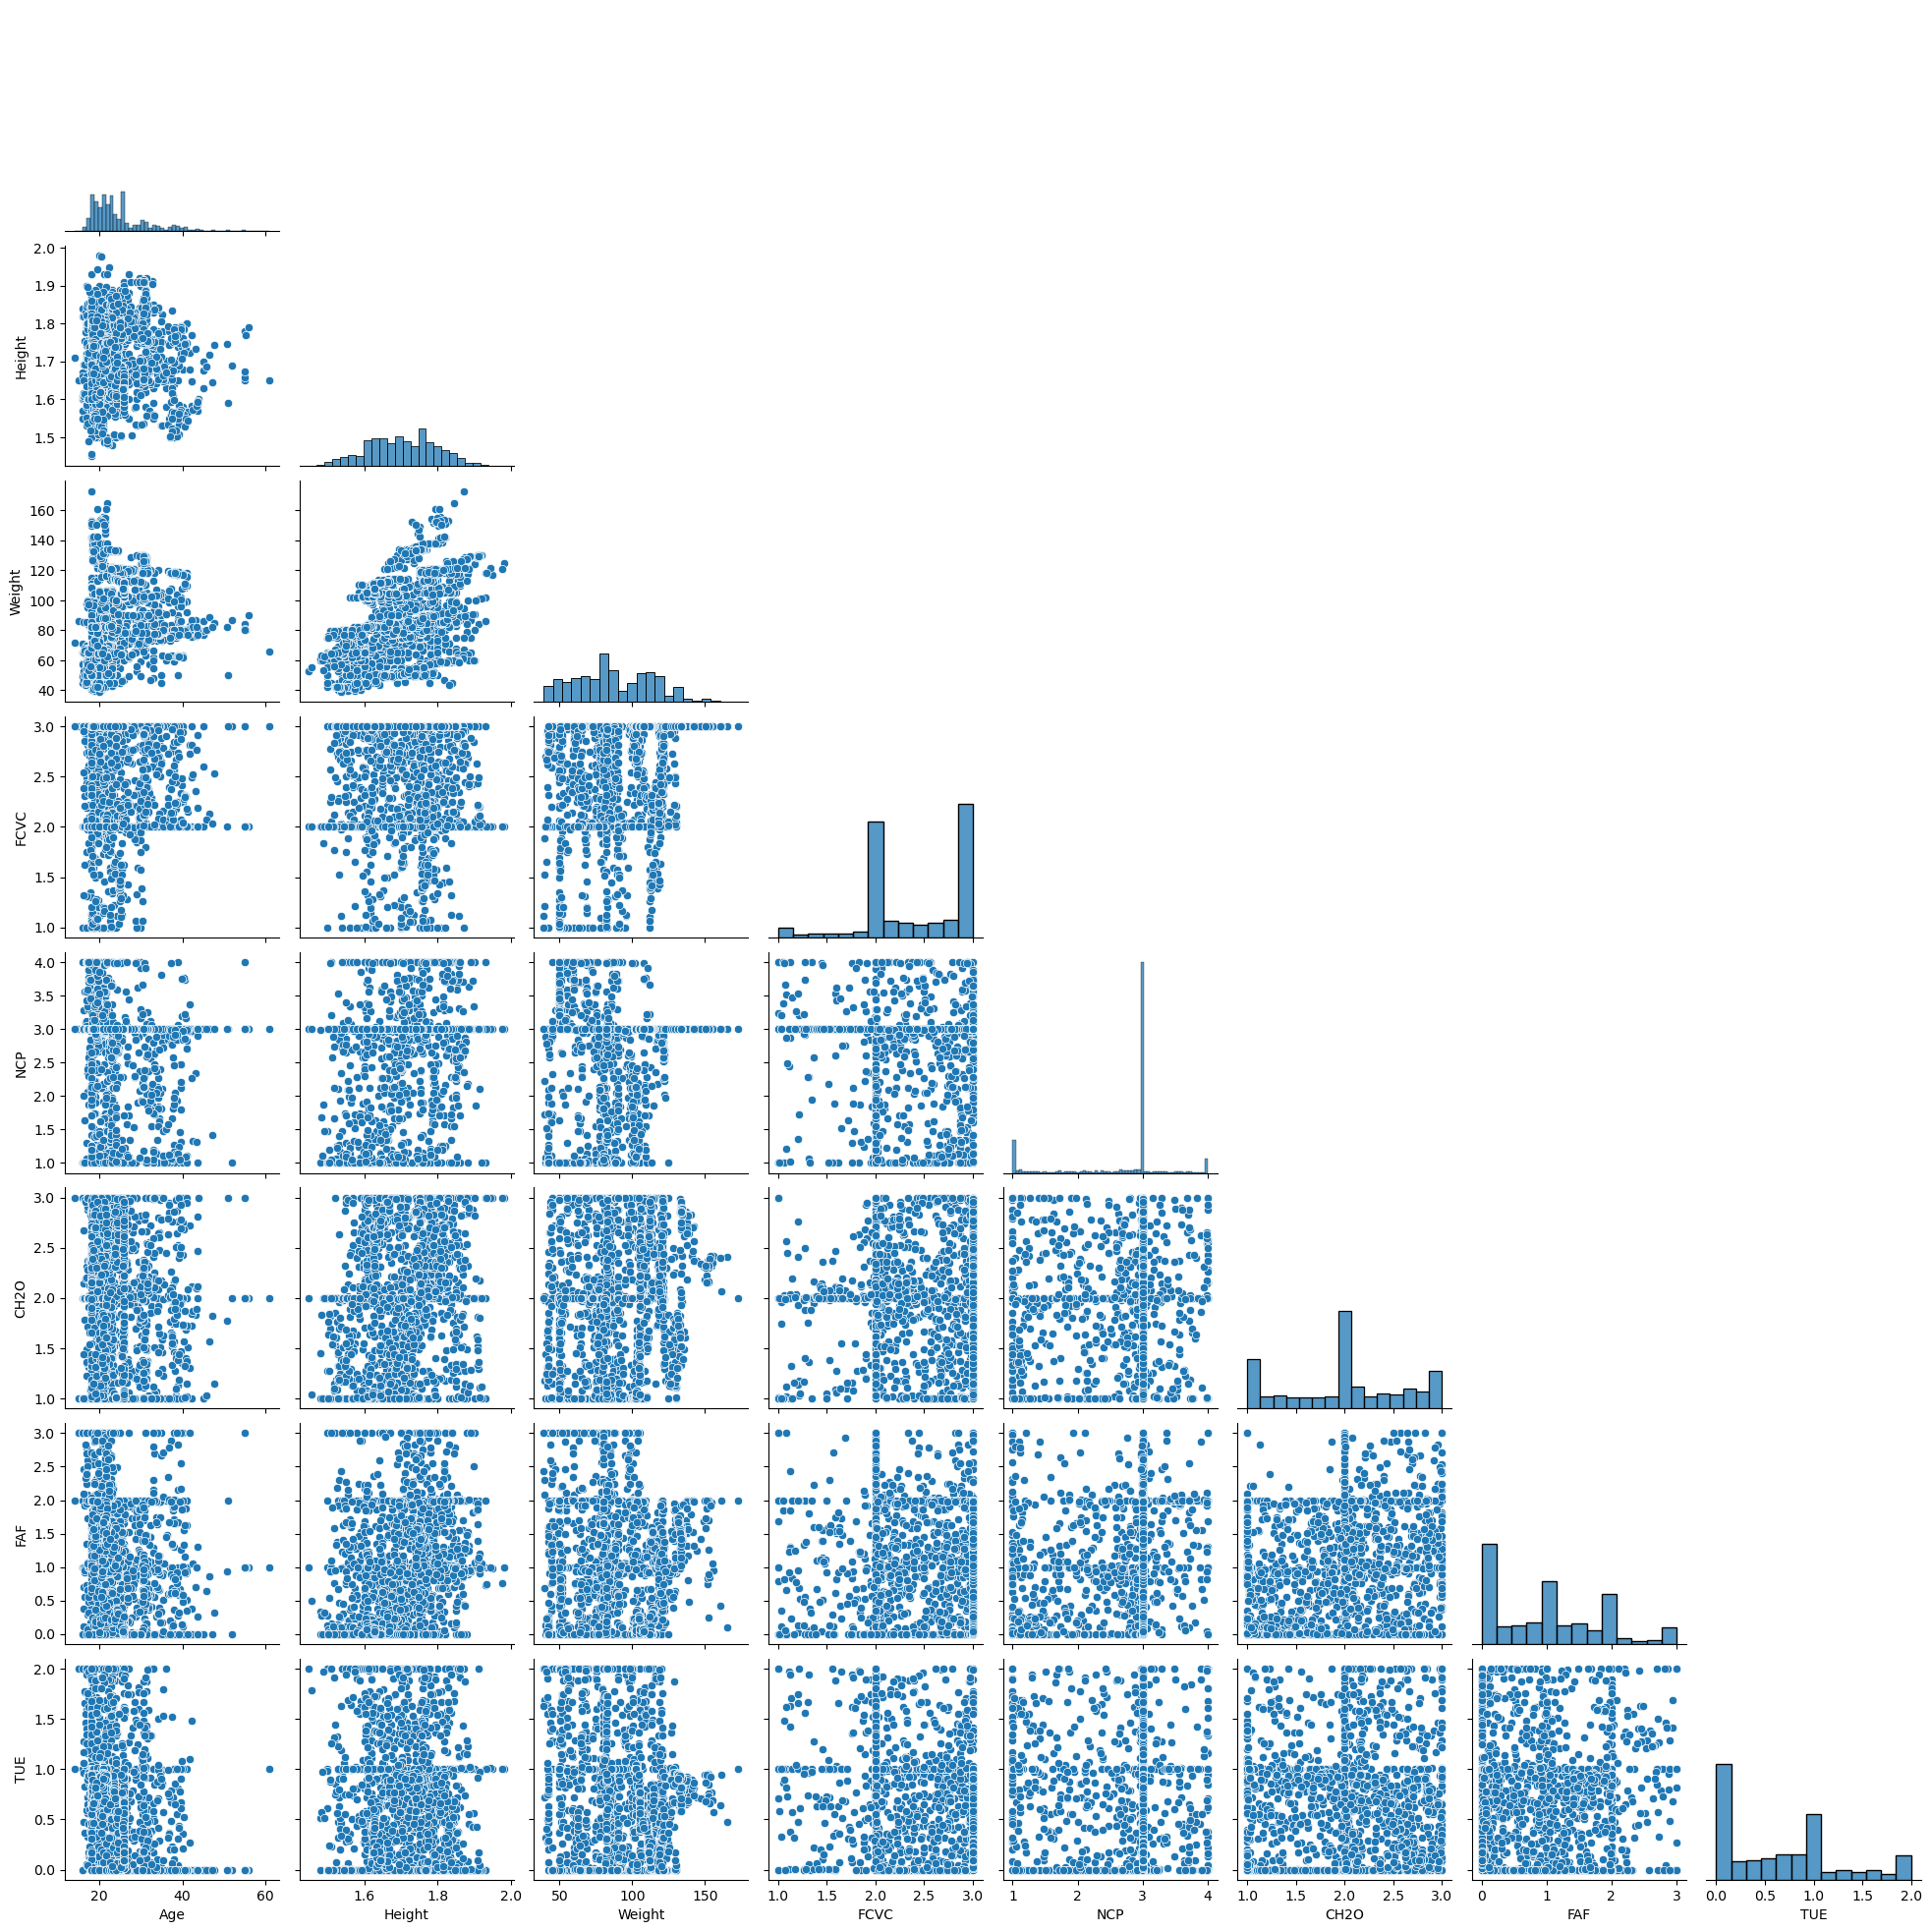

In [72]:
sns.pairplot(df, corner=True)

<AxesSubplot:>

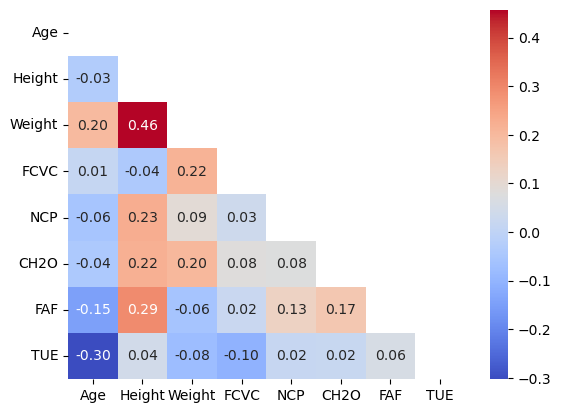

In [75]:
# Compute the lower triangle mask
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Create a heatmap with the lower triangle mask
sns.heatmap(df.corr(), mask=mask, cmap='coolwarm', annot=True, fmt=".2f")

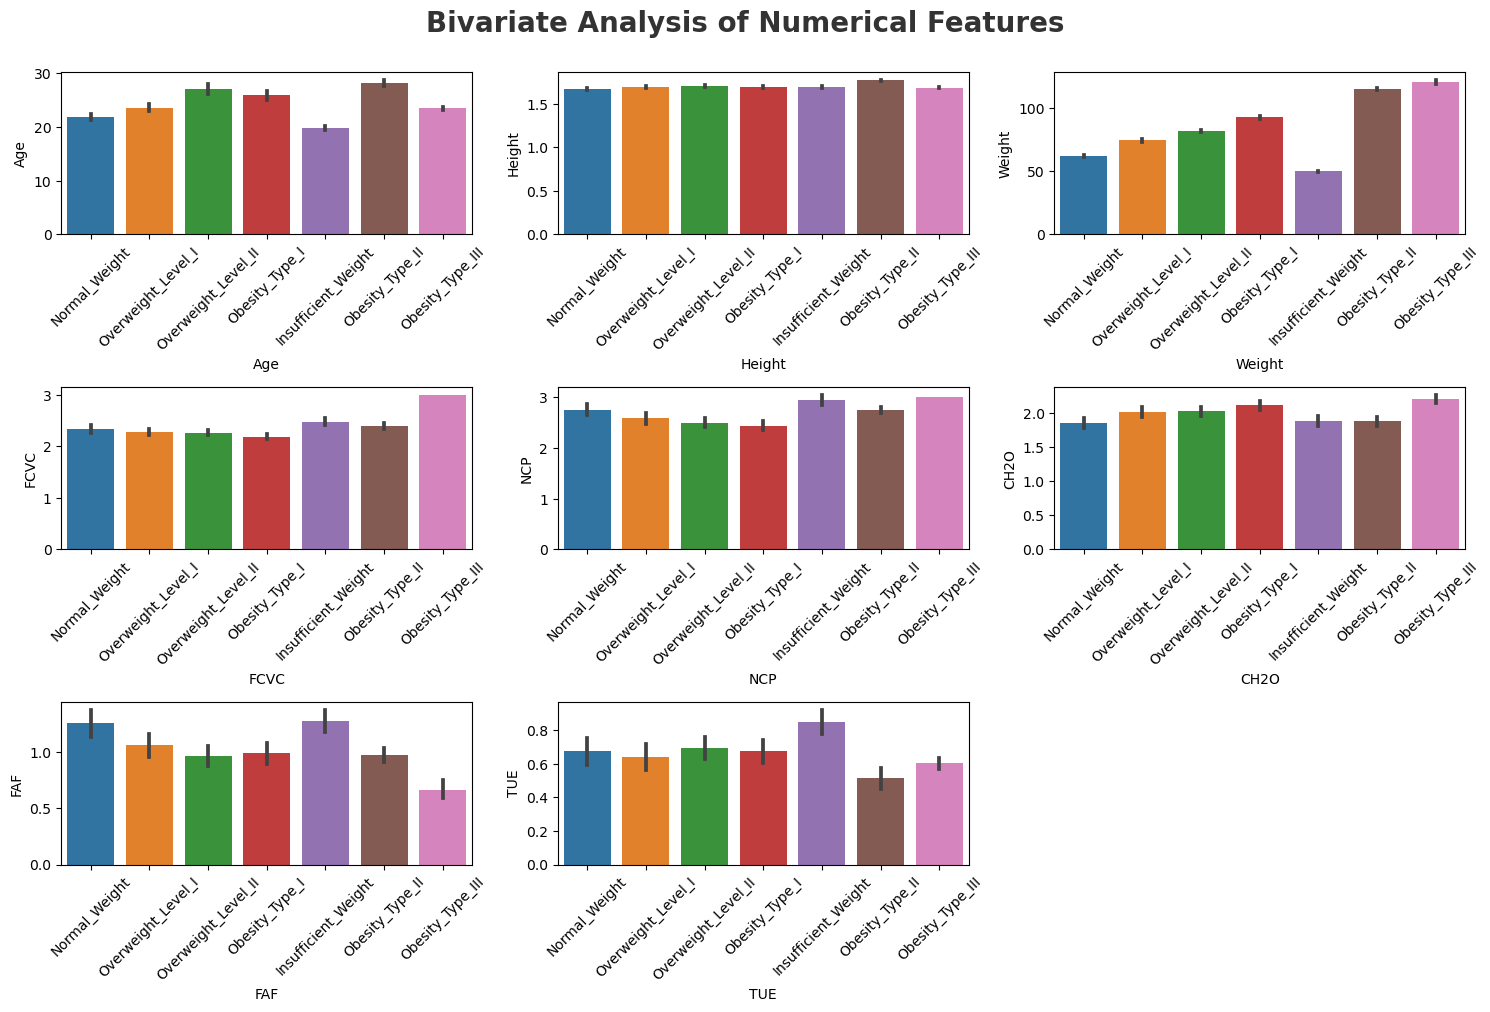

In [84]:
plt.figure(figsize=(15, 15))
plt.suptitle('Bivariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_columns)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=df[numerical_columns[i]],x=df['NObeyesdad'])
    plt.xlabel(numerical_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [89]:
# Splitting X and y for all Experiments
X= df.drop('NObeyesdad', axis=1)
X=pd.get_dummies(df,drop_first=True)

In [110]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()



# Fit and Transform the categorical variable into encoded labels
y = label_encoder.fit_transform(df['NObeyesdad'])
y

array([1, 1, 1, ..., 4, 4, 4])

In [197]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    return acc

In [198]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('='*35)
        print('\n')

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [200]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [201]:
evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9928


Logistic Regression
Model performance for Training set
- Accuracy: 0.9946
----------------------------------
Model performance for Test set
- Accuracy: 0.9904


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9467
----------------------------------
Model performance for Test set
- Accuracy: 0.9282


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000


CatBoosting Classifier
Model performance for Traini

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [205]:
rfc=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
cv_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [206]:
cv_rfc.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [207]:
final_model=cv_rfc.best_estimator_
y_pred = final_model.predict(X_test)

In [208]:
final_model=cv_rfc.best_estimator_
y_pred = final_model.predict(X_test)

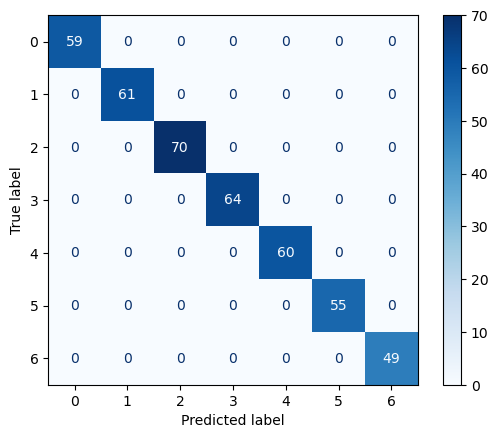

In [209]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')